## MEJ Python Data Analysis & Visualization Training

Summer 2020

At this point, you should already have python and jupyter notebooks downloaded using Anaconda. Therefore, nothing new should need to be downloaded or installed ahead. If at any point you receive an error that a library isn’t installed, simply type “pip install package” in the terminal.  

During this training, we’ll learn how to bring in, explore, visualize, and analyze our data using some common commands.


### Step 1: Import packages

In [1]:
import numpy as np # numpy is used for scientific computing and working with arrays
import matplotlib.pyplot as plt # matplotlib is used for plotting
import pandas as pd # pandas is used for data analysis and makes working with data tables easier
import geopandas as gpd # geopandas is used for spatial data analysis
import statsmodels.formula.api as smf # statsmodels is an easy to use package for regression that works very similar to R


### Step 2: Read in the data

Note that the data you read in needs to be in the same directory (folder) as your notebook

In [2]:
df = pd.read_csv("EJSCREEN_2019.csv")
df.head()

/Users/kelly/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,PM25,OZONE,DSLPM,CANCER,...,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area
0,1,1.001020e+10,Alabama,AL,4,692,9.998131694,40.12172876,0.278663069,49.37703161,...,0.188584,0.126115,0.083815,0.293353,0.040000,0.195011,0.049133,0.095376,13435.975560,6026827.887
1,2,1.001020e+10,Alabama,AL,4,1153,9.998131694,40.12172876,0.278663069,49.37703161,...,0.175629,0.097009,0.169124,0.182134,0.000000,0.039120,0.041631,0.150043,11945.584680,7848121.478
2,3,1.001020e+10,Alabama,AL,4,1020,10.07006011,40.22394902,0.304312509,50.32074093,...,0.613626,0.266618,0.667647,0.559606,0.000000,0.191083,0.032353,0.149020,7770.915121,2900773.822
3,4,1.001020e+10,Alabama,AL,4,1152,10.07006011,40.22394902,0.304312509,50.32074093,...,0.416216,0.191142,0.509549,0.322884,0.012376,0.171838,0.034722,0.095486,6506.804784,1793331.694
4,5,1.001020e+10,Alabama,AL,4,2555,10.11846913,40.30911699,0.364214772,50.7721395,...,0.396477,0.180288,0.409393,0.383562,0.000000,0.140046,0.025832,0.122896,11070.367850,5461601.630


### Step 3: Explore the data

First, try out .shape to see the size of your dataframe. The shape function is a numpy  funtion that can be used to get the current shape of an array. For example, for dataframe or matrix, shape will first return the number of rows, followed by the number of columns.

In [3]:
# Your code here

In [4]:
df.shape

(220333, 27)

Alternatively, if you just want to see who many rows your dataframe is, you can use the len() function. The length function is a built-in python function that can be used on different types of objects. For instance len("apple") will return 5 and len(df) will return the number of rows in your dataframe.

In [5]:
# Your code here

In [6]:
len(df)

220333

To see a list of the column names, use the built-in python list() function with the pandas .columns function, which returns column labels.

In [7]:
# Your code here

In [8]:
list(df.columns)[0]

'OBJECTID'

Now let's see how many null values we have by column. Pandas doesn't like to print out all the row values, so since we have 78 columns we need to change the pandas display options to show max rows (you can also do this for max columns).

In [9]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

OBJECTID        0
ID              0
STATE_NAME      0
ST_ABBREV       0
REGION          0
ACSTOTPOP       0
PM25            0
OZONE           0
DSLPM           0
CANCER          0
RESP            0
PTRAF           0
PRE1960PCT      0
PNPL            0
PRMP            0
PTSDF           0
PWDIS           0
VULEOPCT        0
VULSVI6PCT      0
MINORPCT        0
LOWINCPCT       0
LINGISOPCT      0
LESSHSPCT       0
UNDER5PCT       0
OVER64PCT       0
Shape_Length    0
Shape_Area      0
dtype: int64

For this dataset, null values are input as "None" - this is why python told us some columns have mixed datatypes and null values counts sum to 0. If we were going to use these columns we need to change all "None" values to null values. 

First let's confirm which columns have mixed datatypes - they will have an object datatype.

In [10]:
# Use .dtypes 
# Your code here

In [11]:
df.dtypes

OBJECTID          int64
ID              float64
STATE_NAME       object
ST_ABBREV        object
REGION            int64
ACSTOTPOP         int64
PM25             object
OZONE            object
DSLPM            object
CANCER           object
RESP             object
PTRAF           float64
PRE1960PCT      float64
PNPL            float64
PRMP            float64
PTSDF           float64
PWDIS            object
VULEOPCT        float64
VULSVI6PCT      float64
MINORPCT        float64
LOWINCPCT       float64
LINGISOPCT      float64
LESSHSPCT       float64
UNDER5PCT       float64
OVER64PCT       float64
Shape_Length    float64
Shape_Area      float64
dtype: object

Now we'll use .replace(old value, new value) to replace None values with np.nan - null values. Remember to save your results by saving the output to df and check your results by seeing how many null values there are now.

In [12]:
# Your code here

In [13]:
df = df.replace('None', np.nan)
df.isnull().sum()

OBJECTID           0
ID                 0
STATE_NAME         0
ST_ABBREV          0
REGION             0
ACSTOTPOP          0
PM25            4258
OZONE           4258
DSLPM            646
CANCER           646
RESP             646
PTRAF              0
PRE1960PCT         0
PNPL               0
PRMP               0
PTSDF              0
PWDIS            534
VULEOPCT           0
VULSVI6PCT         0
MINORPCT           0
LOWINCPCT          0
LINGISOPCT         0
LESSHSPCT          0
UNDER5PCT          0
OVER64PCT          0
Shape_Length       0
Shape_Area         0
dtype: int64

Finally we need to change columns with object data types to float data types. Check your results by using dtypes again.

In [14]:
df[['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'PWDIS']] = df[['PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'PWDIS']].astype(float)
# ID, the block FIPS ID, should also be an object rather than a float so we'll change that here too
# first we need to convert ID to an integer though
df['ID'] = df['ID'].astype(int)
df['ID'] = '0' + df['ID'].astype(str)
df.dtypes

OBJECTID          int64
ID               object
STATE_NAME       object
ST_ABBREV        object
REGION            int64
ACSTOTPOP         int64
PM25            float64
OZONE           float64
DSLPM           float64
CANCER          float64
RESP            float64
PTRAF           float64
PRE1960PCT      float64
PNPL            float64
PRMP            float64
PTSDF           float64
PWDIS           float64
VULEOPCT        float64
VULSVI6PCT      float64
MINORPCT        float64
LOWINCPCT       float64
LINGISOPCT      float64
LESSHSPCT       float64
UNDER5PCT       float64
OVER64PCT       float64
Shape_Length    float64
Shape_Area      float64
dtype: object

Since we're only interested in Colorado for now, let's create a subset of our data. 

In [15]:
co = df[df.STATE_NAME == 'Colorado']
print(len(co))
co.head()

3532


,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,PM25,OZONE,DSLPM,CANCER,...,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area
33509,33510,080010078011,Colorado,CO,8,1933,8.062005,51.944987,0.799128,34.081334,...,0.729953,0.401765,0.887739,0.572168,0.281350,0.503788,0.123642,0.041904,3134.180033,543472.1947
33510,33511,080010078012,Colorado,CO,8,2479,8.062005,51.944987,0.799128,34.081334,...,0.808390,0.429027,0.889472,0.727309,0.387052,0.402520,0.120210,0.047600,3144.734601,542926.4504
33511,33512,080010078021,Colorado,CO,8,1476,8.053269,51.970225,0.948835,33.490825,...,0.771003,0.367927,0.873984,0.668022,0.094118,0.362090,0.110434,0.098916,3126.356259,540951.6832
33512,33513,080010078022,Colorado,CO,8,1279,8.053269,51.970225,0.948835,33.490825,...,0.839380,0.415036,0.874902,0.803859,0.287879,0.456338,0.052385,0.014855,2068.248065,267485.7529
33513,33514,080010078023,Colorado,CO,8,1839,8.053269,51.970225,0.948835,33.490825,...,0.858619,0.457151,0.912452,0.804785,0.367906,0.574565,0.064709,0.018488,2080.124213,270898.4807


Now let's look at some basic statistics about our data using .describe()

In [16]:
# Your code here

In [17]:
co.describe()

,OBJECTID,REGION,ACSTOTPOP,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,...,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area
count,3532.000000,3532.0,3532.000000,3532.000000,3532.000000,3525.000000,3525.000000,3525.000000,3532.000000,3532.000000,...,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3532.000000,3.532000e+03
mean,35275.500000,8.0,1539.218290,6.454176,51.979938,0.472452,26.937070,0.335116,589.587502,0.230968,...,0.295849,0.152780,0.303360,0.288337,0.029715,0.093600,0.057547,0.144120,25049.716144,1.266452e+08
std,1019.744903,0.0,940.593562,1.335620,1.872017,0.373273,17.832552,0.132861,924.536229,0.282109,...,0.186735,0.081366,0.225629,0.193933,0.054302,0.104054,0.038851,0.094400,57099.653087,6.796337e+08
min,33510.000000,8.0,0.000000,3.305403,45.309512,0.011906,8.772592,0.090885,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1428.874655,1.135435e+05
25%,34392.750000,8.0,935.000000,5.386258,51.315067,0.174468,17.925228,0.226980,77.097182,0.011920,...,0.151085,0.092406,0.130980,0.131083,0.000000,0.020843,0.029781,0.077242,4197.499244,8.745961e+05
50%,35275.500000,8.0,1340.500000,6.612704,52.243261,0.395232,24.704014,0.330790,299.180726,0.082940,...,0.244206,0.130865,0.236406,0.254914,0.000000,0.056690,0.052967,0.127422,6274.386976,1.664394e+06
75%,36158.250000,8.0,1880.250000,7.613415,53.268988,0.704901,32.401157,0.434913,720.197469,0.398244,...,0.409617,0.194651,0.428828,0.410036,0.036679,0.126519,0.078823,0.192501,14346.258835,7.081164e+06
max,37041.000000,8.0,12640.000000,8.791532,55.162273,2.376349,525.559560,0.880978,11248.371760,1.000000,...,0.920429,0.464153,0.980800,1.000000,0.425494,0.635693,0.424559,0.887725,714459.588000,1.555882e+10


There seems to be a large variance in Cancer Risk. Let's look at the 5 census blocks with the largest Cancer Risk.

In [18]:
co.sort_values(by = ['CANCER'], ascending = False)[['ID', 'ACSTOTPOP', 'CANCER']].head(5)

,ID,ACSTOTPOP,CANCER
35862,080590109021,1194,525.559560
35863,080590109022,1517,525.559560
35874,080590111005,990,177.473771
35871,080590111002,979,177.473771
35872,080590111003,869,177.473771


### Step 3: Visualize the data

Now that we're familiar with our data, let's start visualizing our data. First let's look at the distribution of Cancer Risk using a histogram to see the spread of Cancer Risk values across census blocks.

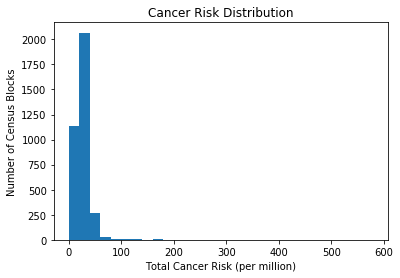

In [19]:
# use range with bins to define bins of size 20 that start at 0 and end at 600
plt.hist(co["CANCER"], bins = range(0,600,20)) 
plt.xlabel("Total Cancer Risk (per million)") # add an x label
plt.ylabel("Number of Census Blocks") # add a y label
plt.title("Cancer Risk Distribution") # add a title
plt.show() # show the figure

While plt.YourPlotStyle is the most straightforward method to create a chart using matplotlib, you can also define the number of subplots first. This gives you more options for plotting. Notice how some of the commands change slightly for seting an x lable and title. There's also no need for plt.show().

This time we'll make a scatter plot of Population versus Cancer Risk to see if there's a relationship between a census block's population and cancer risk. A scatter plot can also show us outliers in our data.

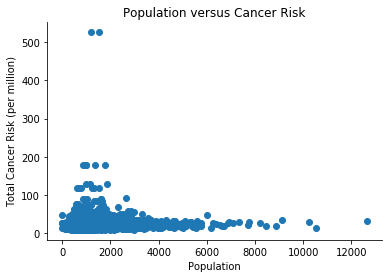

In [20]:
fig, ax = plt.subplots(ncols = 1) # here you're defining 1 subplot, which is called ax
ax.scatter(co["ACSTOTPOP"], co["CANCER"])
ax.set_xlabel("Population") # add an x label
ax.set_ylabel("Total Cancer Risk (per million)") # add a y label
ax.spines['right'].set_visible(False) # you can get rid of unwanted axes with this code
ax.spines['top'].set_visible(False)
_ = ax.set_title("Population versus Cancer Risk") # _ prevents this command from printing out the title

Explore some other relationships with your own chart below.

In [21]:
# Your code goes here

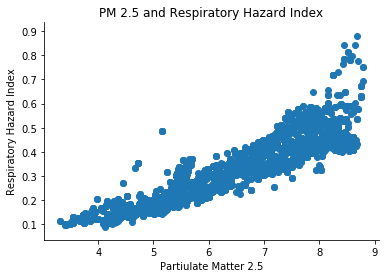

In [22]:
fig, ax = plt.subplots(ncols = 1) # here you're defining 1 subplot, which is called ax
ax.scatter(co["PM25"], co['RESP'])
ax.set_xlabel("Partiulate Matter 2.5") # add an x label
ax.set_ylabel("Respiratory Hazard Index") # add a y label
ax.spines['right'].set_visible(False) # you can get rid of unwanted axes with this code
ax.spines['top'].set_visible(False)
_ = ax.set_title("PM 2.5 and Respiratory Hazard Index") # _ prevents this command from printing out the title

Now let's compare an indicator between census blocks with higher proportions of minorities with census blocks
with lower proportions of minorities by first subsetting the data. Then we'll use a bar chart to compare indicator rates between these two sets of data to see if there seems to be a relationship between say respiratory hazard scores and neighborhoods with a high proportion of minorities. 

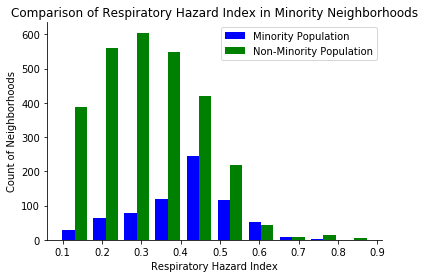

In [23]:
# Create two different subsets of data
minority = co[co['MINORPCT'] > .50]
nonminority = co[co['MINORPCT'] < .50]

# we'll use similar chart styling as above
fig, ax = plt.subplots()
ax.hist([minority['RESP'], nonminority['RESP']], 
        label = ['Minority Population', 'Non-Minority Population'], 
        color = ['b', 'g'])
ax.legend()
ax.set_xlabel("Respiratory Hazard Index")
ax.set_ylabel('Count of Neighborhoods')
ax.set_title('Comparison of Respiratory Hazard Index in Minority Neighborhoods')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Now let's merge our data with a shapefile of Colorado census blocks so that we can map our data. With a map, we can spatially see areas in the state where there are greater respiratory hazards.

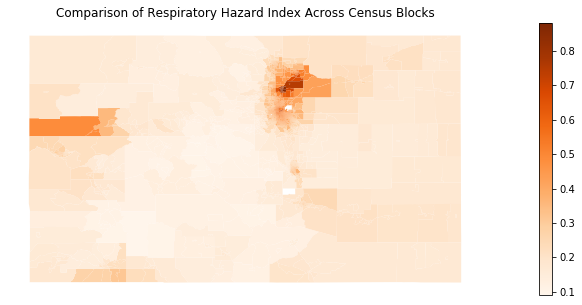

In [24]:
# Read in census block spatial data for Colorado available here: https://data-cdphe.opendata.arcgis.com/datasets/dd006e38a5c24433b9bd85b63cbb26d6_2
co_blocks = gpd.read_file('Colorado_Census_Block_Group_Boundaries-shp')

# Create the FIPS ID variable to merge on
co_blocks['ID'] = co_blocks['STATEFP'] + co_blocks['COUNTYFP'] + co_blocks['TRACTCE'] + co_blocks['BLKGRPCE']

# Merge the block dataframe with the mej colorado dataframe
co_spatial = co.merge(
    co_blocks, 
    how = 'outer', 
    left_on = 'ID', 
    right_on = 'ID',
    validate = 'one_to_one')

# convert the pandas dataframe to a geopandas frame
co_spatial = gpd.GeoDataFrame(co_spatial)

# compare climate vulnerability percentile with social climate vulnerability percentile
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5)) # define the chart size
co_spatial.plot(column = 'RESP', ax = ax, legend = True, cmap = 'Oranges') # in the column argument add the column of interest
ax.set_title('Comparison of Respiratory Hazard Index Across Census Blocks')
_ = plt.axis('off')

### Step 4: Analyze the data

Now let's explore these relationships further through some analysis.

What do you observe in your scatter plots? Does there appear to be a relationship between your variables? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation?

In [25]:
# Use df[['v1', 'v2']].corr()
# Your code here

In [26]:
co[['PM25', 'RESP']].corr()

,PM25,RESP
PM25,1.000000,0.897822
RESP,0.897822,1.000000


Next let's explore correlations between all our variables. Are there any surprising relationships?

In [27]:
# Your code here
# You can use style.background_gradient(cmap = 'RdYlGn') to color your matrix

In [28]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap = 'RdYlGn')

,OBJECTID,REGION,ACSTOTPOP,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area
OBJECTID,1.000000,-0.274937,-0.041826,-0.191809,-0.184176,-0.035571,-0.130947,-0.255122,-0.131126,0.036420,-0.000505,-0.060379,0.035013,-0.002133,-0.057266,-0.042816,-0.098567,0.021883,0.047906,-0.028271,0.012876,-0.019078,0.005820,-0.015540
REGION,-0.274937,1.000000,0.070226,0.064824,0.106543,-0.112966,0.061584,0.143636,0.060413,-0.181817,-0.067487,0.086522,-0.157575,0.004196,0.069890,0.051374,0.086864,0.022379,-0.037659,0.050831,0.061671,-0.055800,0.072773,0.030135
ACSTOTPOP,-0.041826,0.070226,1.000000,0.067681,0.023002,-0.019134,0.064389,0.080395,-0.031293,-0.330124,-0.021143,-0.050961,-0.017279,-0.002765,0.021198,-0.001198,0.091970,-0.089561,0.052243,-0.022562,0.113124,-0.180604,-0.020839,-0.011008
PM25,-0.191809,0.064824,0.067681,1.000000,0.404416,0.275930,0.414808,0.497230,0.198950,0.089275,0.071887,0.211048,0.055485,-0.001967,0.244469,0.228916,0.290929,0.094520,0.144337,0.181515,0.069707,-0.149474,-0.272274,-0.172231
OZONE,-0.184176,0.106543,0.023002,0.404416,1.000000,0.111979,0.092682,0.122892,0.063416,0.052050,0.021174,0.045106,0.035186,-0.001200,0.048232,0.036572,0.080429,-0.015170,0.028735,0.040134,0.040817,-0.095663,-0.097418,-0.022548
DSLPM,-0.035571,-0.112966,-0.019134,0.275930,0.111979,1.000000,0.373859,0.591912,0.413615,0.293304,0.196185,0.212941,0.592630,-0.001491,0.255766,0.228278,0.349367,0.035007,0.209342,0.101428,0.046437,-0.167101,-0.225895,-0.028220
CANCER,-0.130947,0.061584,0.064389,0.414808,0.092682,0.373859,1.000000,0.661812,0.166002,-0.005514,0.055692,0.172885,0.156258,-0.002119,0.216878,0.188408,0.260340,0.082485,0.059438,0.135600,0.051461,-0.108664,-0.145425,-0.033970
RESP,-0.255122,0.143636,0.080395,0.497230,0.122892,0.591912,0.661812,1.000000,0.286664,0.004773,0.095547,0.190885,0.320779,-0.001652,0.320220,0.290279,0.379355,0.129194,0.139631,0.204805,0.066440,-0.145582,-0.183178,-0.041000
PTRAF,-0.131126,0.060413,-0.031293,0.198950,0.063416,0.413615,0.166002,0.286664,1.000000,0.195773,0.114765,0.151550,0.255995,-0.001050,0.212825,0.201390,0.258896,0.076392,0.177791,0.118831,0.020742,-0.105805,-0.114938,-0.011887
PRE1960PCT,0.036420,-0.181817,-0.330124,0.089275,0.052050,0.293304,-0.005514,0.004773,0.195773,1.000000,0.154555,0.228635,0.176049,-0.002718,0.144348,0.132444,0.103015,0.158376,0.027946,0.140454,0.038531,-0.078257,-0.102334,-0.014351


Let's run a regression on a relationship of interest.

In [29]:
# Use model = smf.ols(formula = 'y ~ x', data = df).fit() and print(model.summary())
# Your code here

In [30]:
model = smf.ols(formula = 'CANCER ~ PM25', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 CANCER   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                 4.484e+04
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:58:32   Log-Likelihood:            -8.2126e+05
No. Observations:              215764   AIC:                         1.643e+06
Df Residuals:                  215762   BIC:                         1.643e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8344      0.128     37.705      0.0

Describe your results.

In [31]:
# Your explaination here

With a one unit increase in PM 2.5, the Cancer Risk Indicator increases by 3.24 points. Our p-value is very high and we see a relatively low r-squared value, meaning PM 2.5 doesn't explain much variation in Cancer Risk.